## polynomial kernal 
- f(x,y)=(xT*y + c)^d

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

In [4]:
x1 = np.linspace(-5,5,100)
y1 = np.sqrt(10**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

In [5]:
x2 = np.linspace(-5,+5,100)
y2 = np.sqrt(5**2 - x2**2)

x2 = np.hstack([x2,-x2])
y2 = np.hstack([y2,-y2])

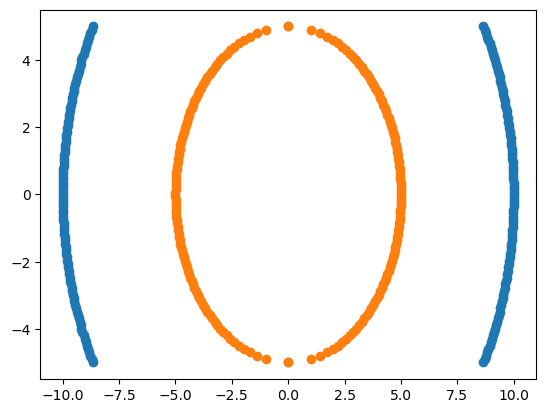

In [6]:
plt.scatter(y1,x1)
plt.scatter(y2,x2)

In [7]:
# convert it to dataframe 
df1  = pd.DataFrame(np.vstack([y1,x1]).T , columns=['x1','x2'])
df2 = pd.DataFrame(np.vstack([y2,x2]).T, columns=['x1','x2'])

In [10]:
df1.head()
df1['y']=0
df1.head()

,x1,x2,y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [11]:
df2.head()
df2['y']=1
df2.head()

,x1,x2,y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1


In [15]:
# concat df1 and df2 
df = pd.concat([df1,df2])
df.head()
df.tail()

,x1,x2,y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


<AxesSubplot: xlabel='x1', ylabel='x2'>

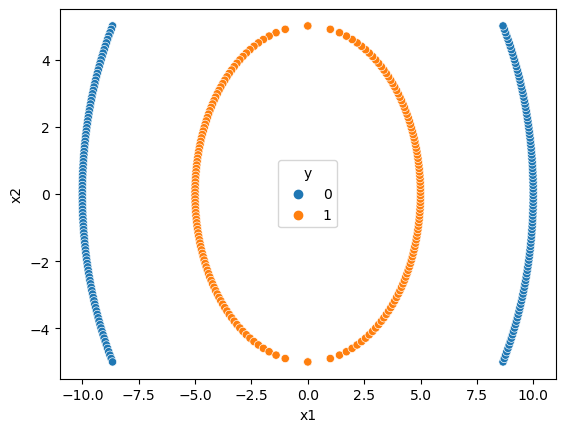

In [22]:
# scatter plot tw x1 and x2
sns.scatterplot(x=df['x1'],y=df['x2'] , hue = df['y'])

In [24]:
# polynomial kernal 
df['x1_sqr'] = df['x1']**2
df['x2_sqr'] = df['x2']**2
df['x1*x2']  = df['x1']*df['x2']
df.head()

,x1,x2,y,x1_sqr,x2_sqr,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [29]:
# indeo and dept feature alda orbo 
X = df.iloc[: ,3:]
y = df['y']

In [30]:
X

,x1_sqr,x2_sqr,x1*x2
0,75.000000,25.000000,-43.301270
1,75.999898,24.000102,-42.708375
2,76.979390,23.020610,-42.096467
3,77.938476,22.061524,-41.466150
4,78.877155,21.122845,-40.818009
...,...,...,...
195,3.877155,21.122845,9.049671
196,2.938476,22.061524,8.051537
197,1.979390,23.020610,6.750316
198,0.999898,24.000102,4.898740


In [31]:
# train test split 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [33]:
# 3d plot create 
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 61.4 MB/s eta 0:00:0000:0100:01


In [46]:
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
import plotly.express as px
import plotly.express as px
fig = px.scatter_3d(df, x='x1_sqr', y='x2_sqr', z='x1*x2',
              color='y')
fig.show()
plt.show()


In [51]:
# svc 
from sklearn.svm import SVC


In [52]:
# model creation 
svc = SVC(kernel='linear')

# traien the model ]
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
# predict 
y_test_pred  = svc.predict(x_test)
y_test_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [54]:
# accuracy confusion matrix classification report check 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(accuracy_score(y_test,y_test_pred))

print(confusion_matrix(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))


1.0
[[52  0]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [56]:
# hyperparameter tuning 
parameter = {'C':[0.01,0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001,0.001],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
            }

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svc,param_grid=parameter,scoring='accuracy',cv=5,verbose=3)
# verbosa dile more information show hbe 

clf.fit(x_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rb

ValueError: X should be a square kernel matrix

In [57]:
clf.best_param_

AttributeError: 'GridSearchCV' object has no attribute 'best_param_'

In [58]:
df.head()

,x1,x2,y,x1_sqr,x2_sqr,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


## RBF

In [59]:
X = df[['x1','x2']]
y= df['y']

In [60]:
X

,x1,x2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [61]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: y, Length: 400, dtype: int64

In [62]:
# train test split 

In [63]:
# train test split 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [64]:
# 
from sklearn.svm import SVC



In [65]:
svc = SVC(kernel='rbf')

svc.fit(x_train,y_train)

SVC()

In [66]:
y_test_pred = svc.predict(x_test)
y_test_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [67]:
# accuracy confusion matrix classification report check 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(accuracy_score(y_test,y_test_pred))

print(confusion_matrix(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))


1.0
[[52  0]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

